In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score
import re

In [2]:
df = pd.read_csv('UpdatedResumeDataset.csv')

In [3]:
# print(df.head())
print(df.shape)

(962, 2)


In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

# Text Preprocessing

In [6]:
## Lowering Case
df['Resume'] = df['Resume'].apply(lambda x:x.lower())

In [7]:
df.head()

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


In [8]:
# Punctuation removal
exclude = string.punctuation
exclude = exclude.replace('+','').replace('#','')

In [9]:
def remove_punc(text):
    for i in exclude:
        text = text.replace(i,'')
    return text

In [10]:
df['Resume'] = df['Resume'].apply(remove_punc)

In [11]:
# Removing URLs
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [12]:
remove_urls("hlo https://www.importlearn.blogspot.com")
remove_urls("hlo www.importlearn.blogspot.com")

'hlo '

In [13]:
df['Resume'] = df['Resume'].apply(remove_urls)

In [14]:
# Removing Stopwords 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [15]:
def remove_stopword(text):
    lst = []
    for i in text.split():
        if i in stopwords:
            continue
        else:
            lst.append(i)
    return " ".join(lst)

In [16]:
df['Resume'] = df['Resume'].apply(remove_stopword)

In [17]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [19]:
stem_words("ask asking learn learning")

'ask ask learn learn'

In [20]:
df['Resume'] = df['Resume'].apply(stem_words)

In [21]:
# Laber Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df['Category'] = le.fit_transform(df['Category'])

# Feature Extraction

In [23]:
df.head()

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may 2013 may 2017 uitrgpv data sci...
2,6,area interest deep learn control system design...
3,6,skill â¢ r â¢ python â¢ sap hana â¢ tablea...
4,6,educ detail mca ymcaust faridabad haryana data...


In [24]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [25]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 1)
(241, 1)
(721, 1)
(241, 1)


In [27]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, binary=True)

In [28]:
X_train_bow = cv.fit_transform(X_train['Resume']).toarray()
X_test_bow = cv.transform(X_test['Resume']).toarray()

In [29]:
print(X_train_bow.shape)

(721, 5000)


In [41]:
category_name = dict(enumerate(le.classes_))

# Modelling

In [31]:
# Gaussian Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [32]:
y_pred = gnb.predict(X_test_bow)

0.9875518672199171

# Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
accuracy_score(y_test, y_pred)

0.9875518672199171

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)

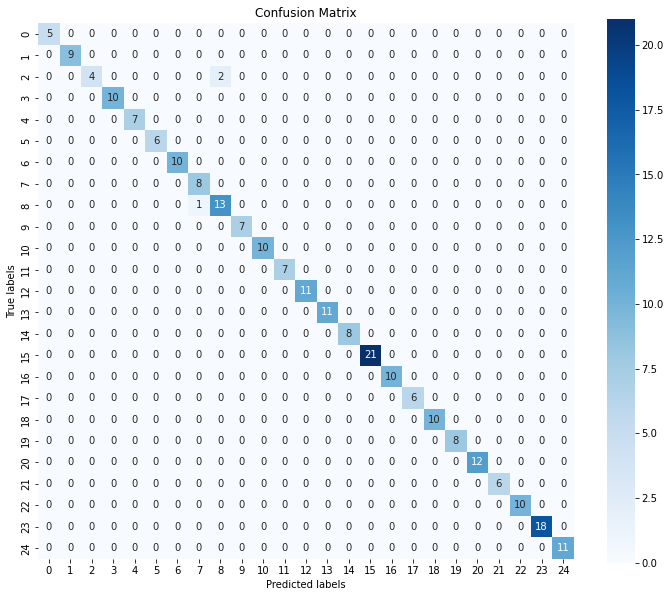

In [56]:
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()